# Kaggle House Prices - Clean Training Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import statistics
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3, style="ticks")
fs = (14, 9) # make the figure wider than the default

## Load the Data

* Load the test set and take a look

In [2]:
# Load the test data
houses = pd.read_csv("data/train.csv")

# Take a look
houses.shape

(1460, 81)

In [3]:
# Sample
houses.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
157,158,60,RL,92.0,12003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,New,Partial,269500
943,944,90,RL,100.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
63,64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal,140000
301,302,60,RL,66.0,16226,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,267000
845,846,85,RL,NaN,16647,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,171000
1330,1331,20,RL,85.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,227000
578,579,160,FV,34.0,3604,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,146000
560,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
334,335,60,RL,59.0,9042,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,192000


## Inspect and correct data types

In [4]:
# Column names and data types
houses.dtypes[0:40]

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
dtype: object

In [5]:
# Column names and data types
houses.dtypes[40:80]

HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
Fence             object
MiscFeature       object
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object


In [6]:
houses.dtypes[80:]

SalePrice    int64
dtype: object

In [7]:
# Replace column names that start with an invalid character
col_names = [key for key in dict(houses.dtypes) if re.search("\.",key) != None]
print("periods: 0") if len(col_names) == 0 else print("periods:",col_names)
col_names = [key for key in dict(houses.dtypes) if re.search("__",key) != None]
print("multiple underscores: 0") if len(col_names) == 0 else print("multiple underscores:",col_names)
col_names = [key for key in dict(houses.dtypes) if re.search("^[^A-Z]",key) != None]
print("invalid start char: 0") if len(col_names) == 0 else print("invalid start char:",col_names)

periods: 0
multiple underscores: 0
invalid start char: ['1stFlrSF', '2ndFlrSF', '3SsnPorch']


### Corrective Actions

* Rename: '1stFlrSF', '2ndFlrSF', '3SsnPorch' to: 'FirstFlrSF', 'SecondFlrSF', 'ThirdSsnPorch'

In [8]:
# Rename columns starting with numbers
new_col_names = ['FirstFlrSF', 'SecondFlrSF', 'ThirdSsnPorch']
new_col_names = dict(zip(col_names,new_col_names))
houses.rename(columns=new_col_names, inplace=True)

## Inspect Missing Data

In [9]:
# What % data (if any) is missing for each column?
nulls = houses.isnull().sum()
nulls = pd.DataFrame(nulls)
nulls.rename(columns={0:"cnt_missing"},inplace=True)
nulls = nulls[nulls.cnt_missing>0]
nulls['pct_missing'] = round(nulls.cnt_missing/houses.shape[0] * 100,2)
nulls.sort_values(by="pct_missing",ascending=False)

,cnt_missing,pct_missing
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


In [10]:
# Fireplace quality is missing where Fireplaces == 0
houses.loc[houses.Fireplaces==0].shape[0]

690

Mean: 70.04995836802665
Median: 69.0
Mode: 60.0
Max: 313.0
Min: 21.0
SD: 24.284751774483208


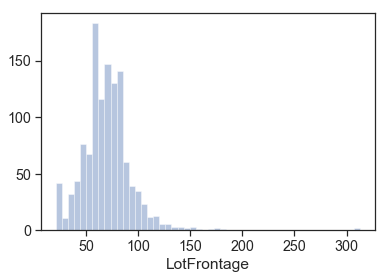

In [11]:
# Inspect possible values for lot frontage
lotfrontage = houses.LotFrontage.dropna()
print("Mean:",statistics.mean(lotfrontage))
print("Median:",statistics.median(lotfrontage))
print("Mode:",statistics.mode(lotfrontage))
print("Max:",max(lotfrontage))
print("Min:",min(lotfrontage))
print("SD:",statistics.stdev(lotfrontage))
sns.distplot(lotfrontage, kde=False)

In [12]:
# Is missingness of lot frontage related to sale price?
houses["LF_Missing"] = houses.LotFrontage.isnull()

In [13]:
houses[["LF_Missing","SalePrice"]].groupby("LF_Missing").mean()

,SalePrice
LF_Missing,
False,180770.480433
True,181620.073359


In [14]:
msp = statistics.mean(houses.SalePrice)
print("LF Not Missing:",(180770.480433-msp)/msp*100)
print("    LF Missing:",(181620.073359-msp)/msp*100)

LF Not Missing: -0.08330447776956529
    LF Missing: 0.3862883313088328


In [15]:
# Garages - all cols are missing for houses with no garage
houses[houses.GarageFinish.isnull()][["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]][0:10]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


In [16]:
print(houses.GarageType.unique())
print(houses.GarageYrBlt.unique())
print(houses.GarageFinish.unique())
print(houses.GarageQual.unique())
print(houses.GarageCond.unique())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [17]:
# Basement
houses[houses.BsmtQual.isna()][["BsmtFinSF1","BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1"]]

,BsmtFinSF1,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
17,0,NaN,NaN,NaN,NaN,NaN
39,0,NaN,NaN,NaN,NaN,NaN
90,0,NaN,NaN,NaN,NaN,NaN
102,0,NaN,NaN,NaN,NaN,NaN
156,0,NaN,NaN,NaN,NaN,NaN
182,0,NaN,NaN,NaN,NaN,NaN
259,0,NaN,NaN,NaN,NaN,NaN
342,0,NaN,NaN,NaN,NaN,NaN
362,0,NaN,NaN,NaN,NaN,NaN
371,0,NaN,NaN,NaN,NaN,NaN


### Corrective Actions

* PoolQC, MiscFeature, Alley, and Fence are missing for > 80% of rows.  Discard these columns.
* LotFrontage are missing for > 15% of rows; since SalePrices doesn't vary whether or not LotFrontage is missing, it's not MNAR
  * impute LotFrontage as mean(LotFrontage)
* Do the remaining acitons in the modeling script
    * FireplaceQu is missing only for houses that have Fireplace = 0, replace 'nan' with 'NA'
    * Treat 'NaN' values for Garage columns as "NA" (except for GarageYrBuilt)
    * Treat 'NaN' values for MasVnrType as "NA" and for MasVnrArea as 0

In [18]:
# Drop columns PoolQC, MiscFeature, Alley, and Fence
houses.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
houses.shape

(1460, 78)

In [19]:
# LotFrontage
meanlotfrontage = statistics.mean(lotfrontage)
meanlotfrontage
houses.LotFrontage.fillna(meanlotfrontage, inplace=True)

## Remove any other unwanted columns

* ID doesn't make sense as a predictor

In [20]:
houses.drop(["Id"], axis = 1, inplace=True)
houses.shape

(1460, 77)

## Save Output

* Save the cleaned data to a new file

In [21]:
houses.to_csv('data/cleaned_data/cleaned_train.csv')